# Data 245 - Machine Learning Project 

# Internet Downtime Prediction Analysis using ML Techniques

### Presented By: Group 6 (Bhavik Patel, Poojan Gagrani, Kashish Thakur, Yuti Khamker)

## 1. Importing libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

## 2. Reading file

In [40]:
df = pd.read_csv('Outage_Data.csv')

## 3. Data understanding

### Original feature description from data source, Ref: https://wiki.mozilla.org/Mozilla_Network_Outages_Data_Project

`country`: the Country code of the client.

`city`: the City name (only for cities with a population >= 15000, 'unknown' otherwise).

`datetime`: the date and the time (truncated to hour) the data was submitted by the client.

`proportion_undefined`: the proportion of users who failed to send telemetry for a reason that was not listed in the other cases.

`proportion_timeout`: the proportion of users that had their connection timeout while uploading telemetry (after 90s, in Firefox Desktop).

`proportion_abort`: the proportion of users that had their connection terminated by the client (for example, terminating open connections before shutting down).

`proportion_unreachable`: the proportion of users that failed to upload telemetry because the server was not reachable (e.g. because the host was not reachable, proxy problems or OS waking up after a suspension).

`proportion_terminated`: the proportion of users that had their connection terminated internally by the networking code.

`proportion_channel_open`: the proportion of users for which the upload request was terminated immediately, by the client, because of a Necko internal error.

`avg_dns_success_time`: the average time it takes for a successful DNS resolution, in milliseconds.

`missing_dns_success`: counts how many sessions did not report the `DNS_LOOKUP_TIME` histogram.

`avg_dns_failure_time`: the average time it takes for an unsuccessful DNS resolution, in milliseconds.

`missing_dns_failure`: counts how many sessions did not report the `DNS_FAILED_LOOKUP_TIME` histogram.

`count_dns_failure`: the average count of unsuccessful DNS resolutions reported.

`ssl_error_prop`: the proportion of users that reported an error through the `SSL_CERT_VERIFICATION_ERRORS` histogram.

`avg_tls_handshake_time`: the average time after the TCP SYN to ready for HTTP, in milliseconds.

### Defining dataset

In [41]:
df.head()

,country,city,datetime,proportion_undefined,proportion_timeout,proportion_abort,proportion_unreachable,proportion_terminated,proportion_channel_open,avg_dns_success_time,missing_dns_success,avg_dns_failure_time,missing_dns_failure,count_dns_failure,ssl_error_prop,avg_tls_handshake_time
0,US,Cheyenne,2023-02-04 21:00:00+00:00,0.0,0.012821,0.012821,0.474359,0.192308,0.0,52.775416,0.0,10.427558,0.0,2396.313725,0.108374,128.354046
1,US,Lawrence,2023-02-04 00:00:00+00:00,0.0,0.000000,0.004975,0.174129,0.027363,0.0,25.603030,0.0,5.644419,0.0,2471.961340,0.067857,75.701084
2,US,Lynnwood,2023-02-04 17:00:00+00:00,0.0,0.021622,0.005405,0.324324,0.043243,0.0,24.712224,0.0,4.500155,0.0,181.664160,0.044218,70.099312
3,US,San Diego,2023-02-04 12:00:00+00:00,0.0,0.058824,0.000000,0.231729,0.019608,0.0,22.376406,0.0,8.302528,0.0,293.868080,0.086482,68.930444
4,US,Birmingham,2023-02-04 14:00:00+00:00,0.0,0.020741,0.002963,0.345185,0.045926,0.0,38.492211,0.0,8.548575,0.0,267.024954,0.078096,72.508400


**Description**

Showing first 5 values of the dataframe.

In [42]:
df.tail()

,country,city,datetime,proportion_undefined,proportion_timeout,proportion_abort,proportion_unreachable,proportion_terminated,proportion_channel_open,avg_dns_success_time,missing_dns_success,avg_dns_failure_time,missing_dns_failure,count_dns_failure,ssl_error_prop,avg_tls_handshake_time
11905556,DE,Remscheid,2023-01-18 18:00:00+00:00,0.0,0.007614,0.007614,0.167513,0.152284,0.0,22.827740,0.0,10.704429,0.0,41.493827,0.029412,56.669889
11905557,DE,Ingolstadt,2023-01-18 08:00:00+00:00,0.0,0.012777,0.002017,0.115669,0.120377,0.0,23.474448,0.0,12.342897,0.0,49.596201,0.043188,69.744162
11905558,DE,Reutlingen,2023-01-18 14:00:00+00:00,0.0,0.003453,0.006906,0.201657,0.156768,0.0,27.520813,0.0,11.010049,0.0,43.545478,0.038510,71.379777
11905559,DE,Marktoberdorf,2023-01-18 13:00:00+00:00,0.0,0.006757,0.000000,0.141892,0.216216,0.0,19.028394,0.0,17.149718,0.0,46.466019,0.032206,61.628674
11905560,DE,Wilhelmshaven,2023-01-18 13:00:00+00:00,0.0,0.000000,0.003401,0.129252,0.204082,0.0,22.940468,0.0,11.108201,0.0,71.670163,0.062500,70.983001


**Description**

Showing last 5 values of the dataframe.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11905561 entries, 0 to 11905560
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   country                  object 
 1   city                     object 
 2   datetime                 object 
 3   proportion_undefined     float64
 4   proportion_timeout       float64
 5   proportion_abort         float64
 6   proportion_unreachable   float64
 7   proportion_terminated    float64
 8   proportion_channel_open  float64
 9   avg_dns_success_time     float64
 10  missing_dns_success      float64
 11  avg_dns_failure_time     float64
 12  missing_dns_failure      float64
 13  count_dns_failure        float64
 14  ssl_error_prop           float64
 15  avg_tls_handshake_time   float64
dtypes: float64(13), object(3)
memory usage: 1.4+ GB


**Description**

Checking datatypes of the attributes.

In [44]:
df.describe()

,proportion_undefined,proportion_timeout,proportion_abort,proportion_unreachable,proportion_terminated,proportion_channel_open,avg_dns_success_time,missing_dns_success,avg_dns_failure_time,missing_dns_failure,count_dns_failure,ssl_error_prop,avg_tls_handshake_time
count,1.190556e+07,1.190556e+07,1.190556e+07,1.190556e+07,1.190556e+07,1.190556e+07,1.190556e+07,1.190556e+07,1.190555e+07,1.190556e+07,1.190527e+07,1.190556e+07,1.190486e+07
mean,3.455072e-04,1.711625e-02,2.112961e-03,2.880715e-01,1.057625e-01,4.380097e-04,3.236945e+01,1.529984e-05,2.858635e+01,2.378671e-05,4.809393e+02,8.675081e-02,1.096179e+02
std,1.641480e-03,4.207049e-02,3.249694e-03,2.174005e-01,8.333943e-02,1.974159e-03,1.838985e+01,3.434096e-04,1.649364e+02,2.616701e-04,5.570631e+03,4.274521e-02,6.755913e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.141456e+00,0.000000e+00,1.004003e+00,0.000000e+00,1.304348e+00,0.000000e+00,1.259265e+00
25%,0.000000e+00,4.830918e-03,0.000000e+00,1.701389e-01,5.279062e-02,0.000000e+00,2.322804e+01,0.000000e+00,9.126957e+00,0.000000e+00,8.732479e+01,5.889015e-02,7.090951e+01
50%,0.000000e+00,9.900990e-03,7.374631e-04,2.425532e-01,9.039548e-02,0.000000e+00,2.788865e+01,0.000000e+00,1.397506e+01,0.000000e+00,1.514444e+02,7.975035e-02,8.775365e+01
75%,0.000000e+00,1.933702e-02,3.205128e-03,3.425287e-01,1.407586e-01,0.000000e+00,3.531013e+01,0.000000e+00,2.212587e+01,0.000000e+00,2.947745e+02,1.057471e-01,1.222336e+02
max,1.083333e+00,2.913174e+01,3.500000e-01,5.504790e+01,1.998039e+01,1.178082e+00,2.626657e+04,2.646658e-01,4.047982e+04,5.952381e-02,3.843820e+06,9.899034e-01,2.510552e+03


**Description**

Showing descriptive statistics of the dataframe.

In [45]:
df.nunique()

country                         207
city                           7690
datetime                       6552
proportion_undefined         149067
proportion_timeout           599096
proportion_abort             255788
proportion_unreachable      1463879
proportion_terminated       1103235
proportion_channel_open      154042
avg_dns_success_time       11905561
missing_dns_success          104685
avg_dns_failure_time       11905551
missing_dns_failure          122092
count_dns_failure          11707321
ssl_error_prop              1904707
avg_tls_handshake_time     11904865
dtype: int64

**Description**

Showing unique values of the dataframe.

In [46]:
df.isnull().sum()

country                    5949
city                          0
datetime                      0
proportion_undefined          0
proportion_timeout            0
proportion_abort              0
proportion_unreachable        0
proportion_terminated         0
proportion_channel_open       0
avg_dns_success_time          0
missing_dns_success           1
avg_dns_failure_time         10
missing_dns_failure           1
count_dns_failure           295
ssl_error_prop                1
avg_tls_handshake_time      696
dtype: int64

**Description**

Checking the null values in the dataframe.

## 4. Data Quality Report

### Data quality for continuous features

In [10]:
continuous_features = [
    'proportion_undefined', 'proportion_timeout', 'proportion_abort',
    'proportion_unreachable', 'proportion_terminated', 'proportion_channel_open',
    'avg_dns_success_time', 'avg_dns_failure_time', 'count_dns_failure',
    'ssl_error_prop', 'avg_tls_handshake_time'
]

data_quality_report = pd.DataFrame(index=continuous_features)

data_quality_report['Count'] = df[continuous_features].count()

data_quality_report['Missing Values in %'] = (1 - (df[continuous_features].count() / len(df))) * 100

data_quality_report['Cardinality'] = df[continuous_features].nunique()

data_quality_report['Minimum'] = df[continuous_features].min()

data_quality_report['Quartile 1'] = df[continuous_features].quantile(0.25)

data_quality_report['Mean'] = df[continuous_features].mean()

data_quality_report['Median'] = df[continuous_features].median()

data_quality_report['Quartile 3'] = df[continuous_features].quantile(0.75)

data_quality_report['Maximum'] = df[continuous_features].max()

data_quality_report['Standard Deviation'] = df[continuous_features].std()

data_quality_report

,Count,Missing Values in %,Cardinality,Minimum,Quartile 1,Mean,Median,Quartile 3,Maximum,Standard Deviation
proportion_undefined,11905561,0.000000,149067,0.000000,0.000000,0.000346,0.000000,0.000000,1.083333e+00,0.001641
proportion_timeout,11905561,0.000000,599096,0.000000,0.004831,0.017116,0.009901,0.019337,2.913174e+01,0.042070
proportion_abort,11905561,0.000000,255788,0.000000,0.000000,0.002113,0.000737,0.003205,3.500000e-01,0.003250
proportion_unreachable,11905561,0.000000,1463879,0.000000,0.170139,0.288072,0.242553,0.342529,5.504790e+01,0.217401
proportion_terminated,11905561,0.000000,1103235,0.000000,0.052791,0.105763,0.090395,0.140759,1.998039e+01,0.083339
proportion_channel_open,11905561,0.000000,154042,0.000000,0.000000,0.000438,0.000000,0.000000,1.178082e+00,0.001974
avg_dns_success_time,11905561,0.000000,11905561,1.141456,23.228040,32.369445,27.888647,35.310129,2.626657e+04,18.389855
avg_dns_failure_time,11905551,0.000084,11905551,1.004003,9.126957,28.586350,13.975060,22.125873,4.047982e+04,164.936394
count_dns_failure,11905266,0.002478,11707321,1.304348,87.324786,480.939255,151.444444,294.774460,3.843820e+06,5570.631312
ssl_error_prop,11905560,0.000008,1904707,0.000000,0.058890,0.086751,0.079750,0.105747,9.899034e-01,0.042745


### Data quality for categorical features

In [11]:
categorical_features = ['country', 'city']

data_quality_report_categorical = pd.DataFrame(index=categorical_features)

data_quality_report_categorical['Count'] = df[categorical_features].count()

data_quality_report_categorical['Missing Values in %'] = (1 - (df[categorical_features].count() / len(df))) * 100

data_quality_report_categorical['Cardinality'] = df[categorical_features].nunique()

data_quality_report_categorical['Mode'] = df[categorical_features].mode().iloc[0]

data_quality_report_categorical['Mode Frequency'] = df[categorical_features].apply(lambda x: x.value_counts().iloc[0])

data_quality_report_categorical['Mode in %'] = (df[categorical_features].apply(lambda x: x.value_counts().iloc[0]) / len(df)) * 100

data_quality_report_categorical['2nd Mode'] = df[categorical_features].apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else 'N/A')

data_quality_report_categorical['2nd Mode Frequency'] = df[categorical_features].apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else 'N/A')

data_quality_report_categorical['2nd Mode in %'] = (df[categorical_features].apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else 'N/A') / len(df)) * 100

data_quality_report_categorical['3rd Mode'] = df[categorical_features].apply(lambda x: x.value_counts().index[2] if len(x.value_counts()) > 1 else 'N/A')

data_quality_report_categorical['3rd Mode Frequency'] = df[categorical_features].apply(lambda x: x.value_counts().iloc[2] if len(x.value_counts()) > 1 else 'N/A')

data_quality_report_categorical['3rd Mode in %'] = (df[categorical_features].apply(lambda x: x.value_counts().iloc[2] if len(x.value_counts()) > 1 else 'N/A') / len(df)) * 100

data_quality_report_categorical

,Count,Missing Values in %,Cardinality,Mode,Mode Frequency,Mode in %,2nd Mode,2nd Mode Frequency,2nd Mode in %,3rd Mode,3rd Mode Frequency,3rd Mode in %
country,11899612,0.049968,207,US,2267170,19.042950,DE,976025,8.198060,FR,719167,6.040597
city,11905561,0.000000,7690,unknown,650559,5.464329,Cambridge,13834,0.116198,London,12995,0.109151


## 5. Initial Exploratory Data Analysis 

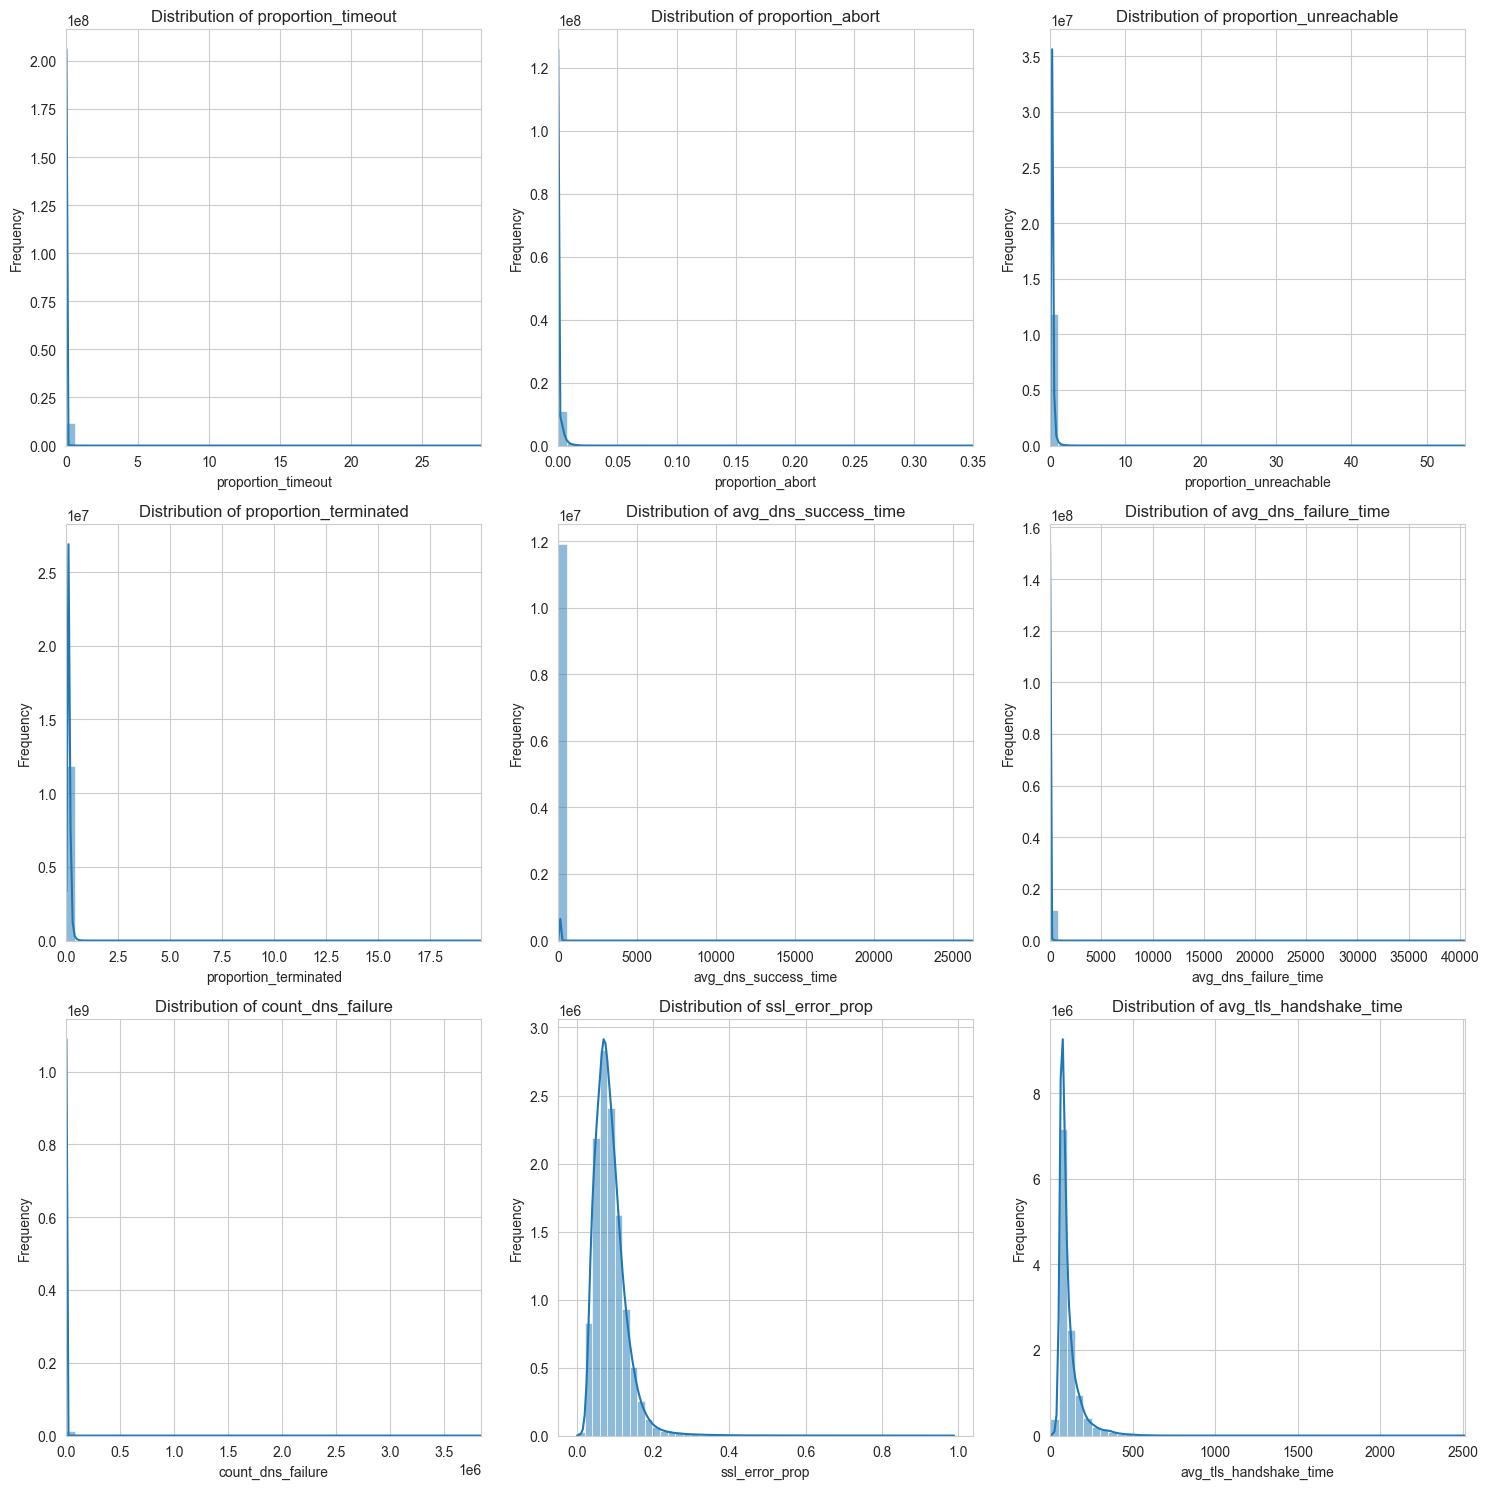

In [11]:
sns.set_style("whitegrid")

selected_columns = [
    'proportion_timeout', 'proportion_abort', 'proportion_unreachable',
    'proportion_terminated', 'avg_dns_success_time', 'avg_dns_failure_time',
    'count_dns_failure', 'ssl_error_prop', 'avg_tls_handshake_time'
]

plt.figure(figsize=(15, 15))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    if 'proportion' in col:
        plt.xlim(0, df[col].max()) 
    elif 'avg' in col:
        plt.xlim(0, df[col].max())
    elif 'count' in col:
        plt.xlim(0, df[col].max()) 

plt.tight_layout()
plt.show()

**Description**

The histogram above demonstrates the ditribution of the continuous features present in the dataset. Here we can observe that most of the proportion values lie between 0 and 1 and they have some values higher than 1 which can possibly be outliers. However, avg_tls_handshake_time, avg_dns_success_time and avg_dns_failure_time have much higher values present the reason behind this is that they are recorded in milliseconds and could be tranformed, if required.

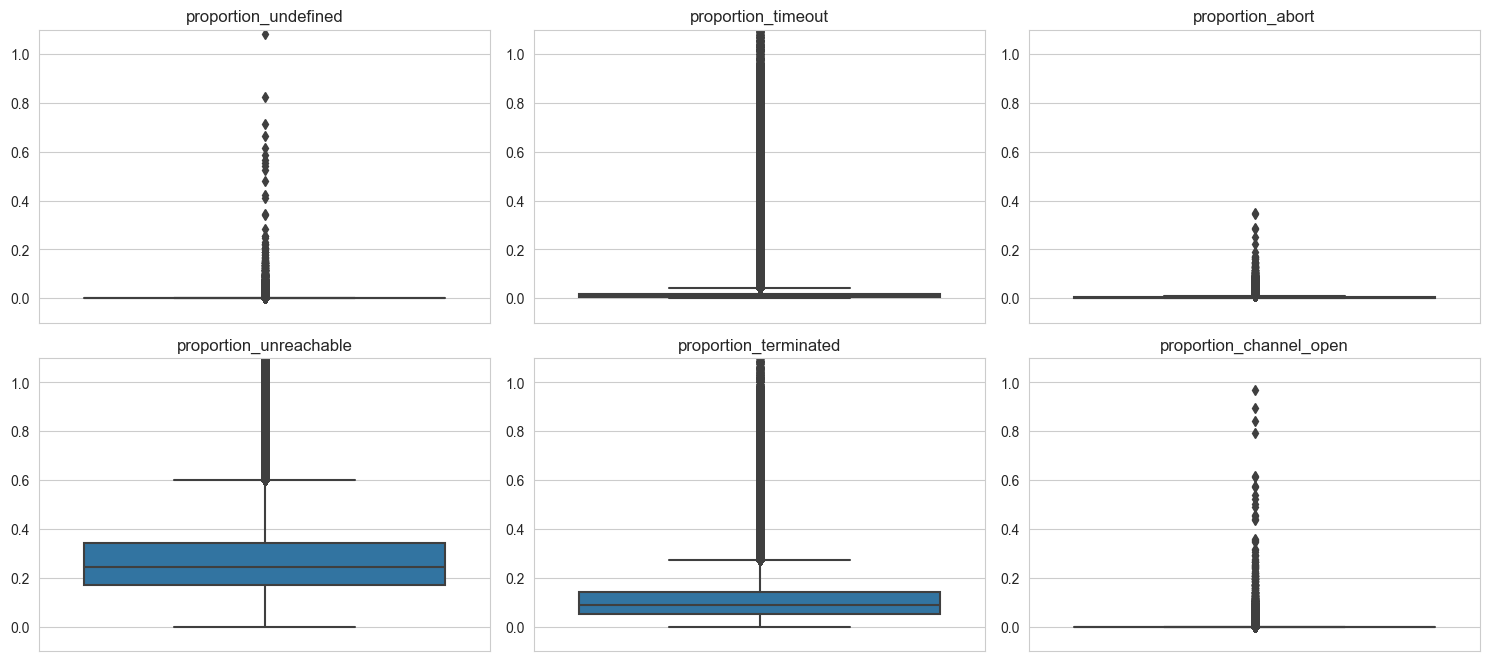

In [12]:
proportion_features = [col for col in df.columns if "proportion" in col]

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

for i, feature in enumerate(proportion_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.ylim(-0.1, 1.1) 
    plt.title(feature)
    plt.ylabel("")

plt.tight_layout()
plt.show()

**Description**

The boxplots above visualizes the spread of data for proportion of the undefined, timeout, abort, unreachable, terminated, channel_open features respectively. They are necessary to understand our target feature as they're the set of features that captures the outcomes of the telemetry signals captured from the host machines. Here, we can observe that proportion_unreachable has the highest spread of values and also aligns with our target feature requirement as it captures the failure of upload of the telemetary signals indicating the possible outage.

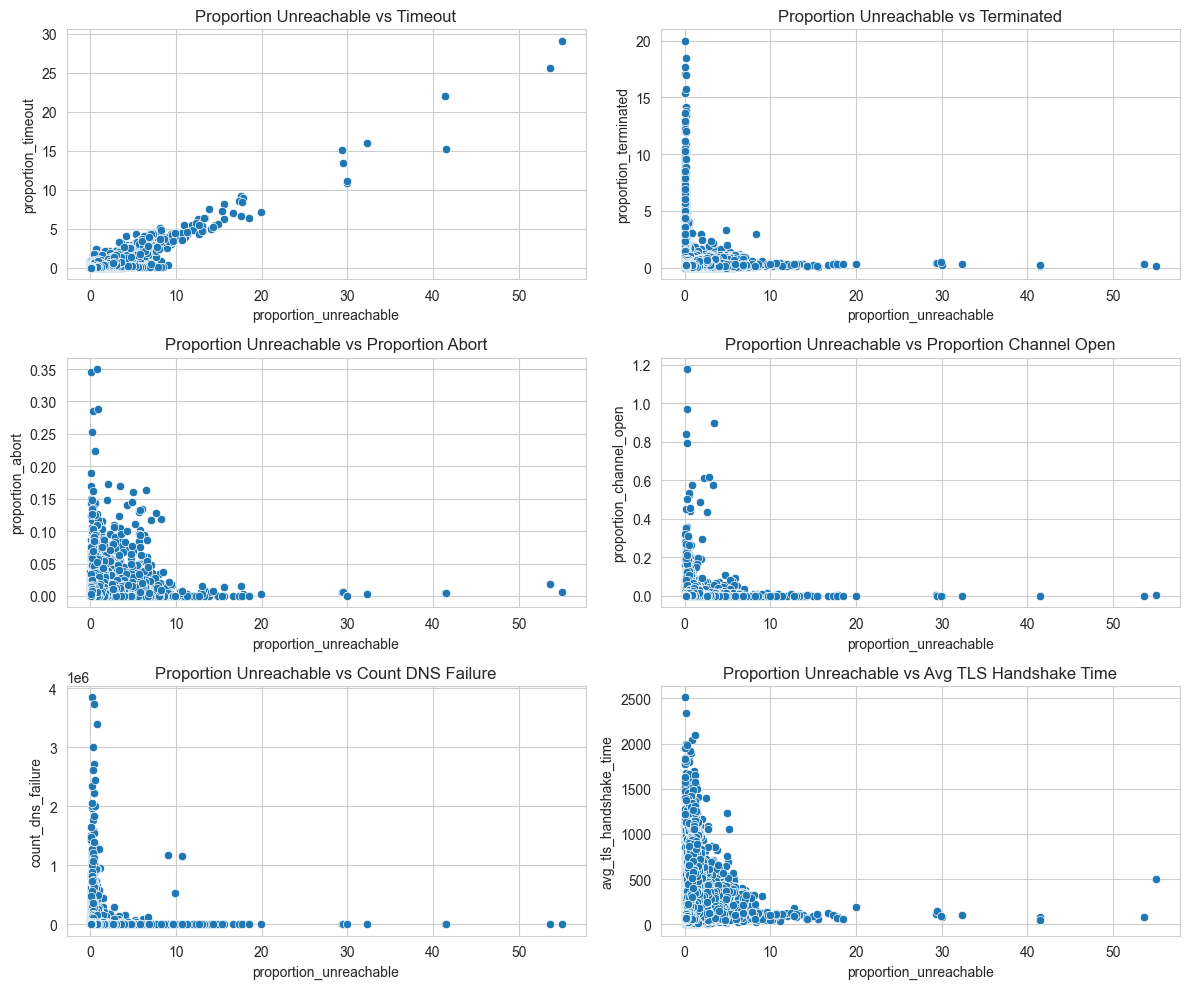

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.scatterplot(data=df, x='proportion_unreachable', y='proportion_timeout', ax=axes[0, 0])
axes[0, 0].set_title('Proportion Unreachable vs Timeout')

sns.scatterplot(data=df, x='proportion_unreachable', y='proportion_terminated', ax=axes[0, 1])
axes[0, 1].set_title('Proportion Unreachable vs Terminated')


sns.scatterplot(data=df, x='proportion_unreachable', y='proportion_abort', ax=axes[1, 0])
axes[1, 0].set_title('Proportion Unreachable vs Proportion Abort')

sns.scatterplot(data=df, x='proportion_unreachable', y='proportion_channel_open', ax=axes[1, 1])
axes[1, 1].set_title('Proportion Unreachable vs Proportion Channel Open')

sns.scatterplot(data=df, x='proportion_unreachable', y='count_dns_failure', ax=axes[2,0])
axes[2,0].set_title('Proportion Unreachable vs Count DNS Failure')

sns.scatterplot(data=df, x='proportion_unreachable', y='avg_tls_handshake_time', ax=axes[2,1])
axes[2,1].set_title('Proportion Unreachable vs Avg TLS Handshake Time')

plt.tight_layout()
plt.show()

**Description**

The scatterplot above demonstrates the spread of the continuous features with respect to proportion_unreachable which is our target feature, this is to understand the correlation and the density of the values lying amongst the features.

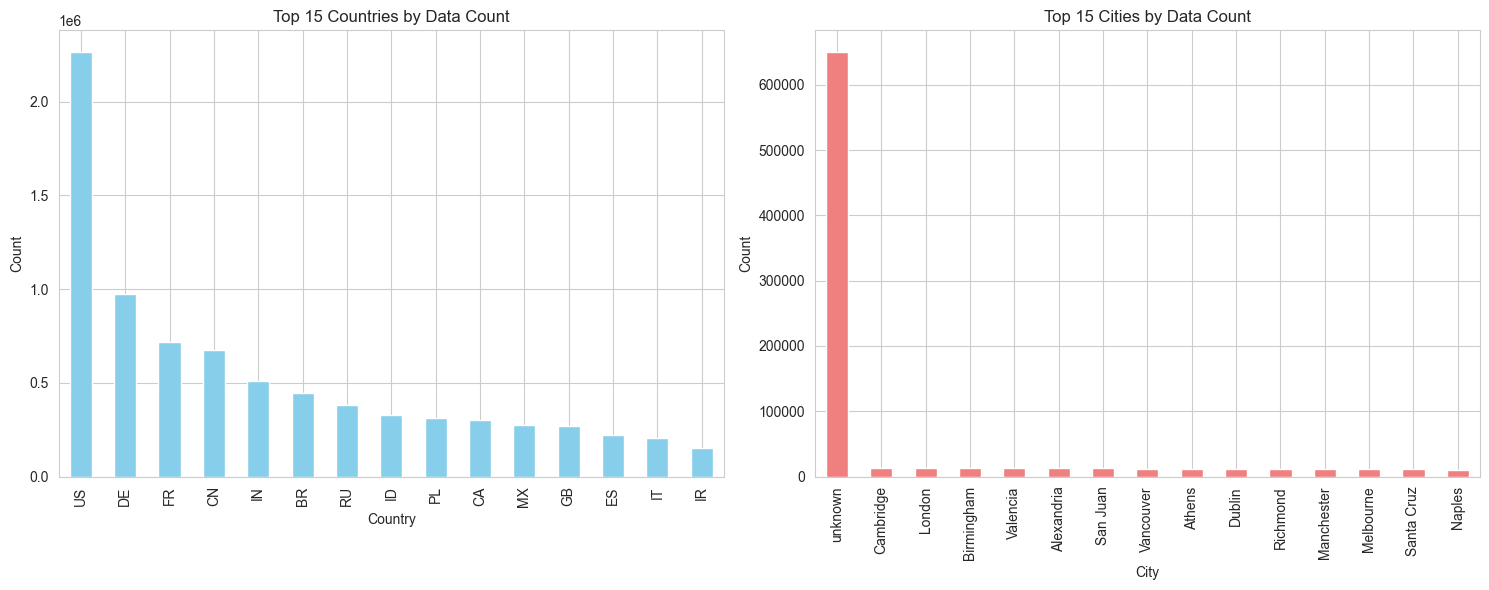

In [14]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
df['country'].value_counts().head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Countries by Data Count')
plt.xlabel('Country')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['city'].value_counts().head(15).plot(kind='bar', color='lightcoral')
plt.title('Top 15 Cities by Data Count')
plt.xlabel('City')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Description**

The barplots above are used to demonstrate the top 15 countries and cities with highest data counts. It's quite significant that the most of the data is captures from United States followed by Germany, France and China. It's important to note that the cities have highest count for unknown as the cities with population less than 15,000 are labelled as unknows as originally mentioned by the data owners. 

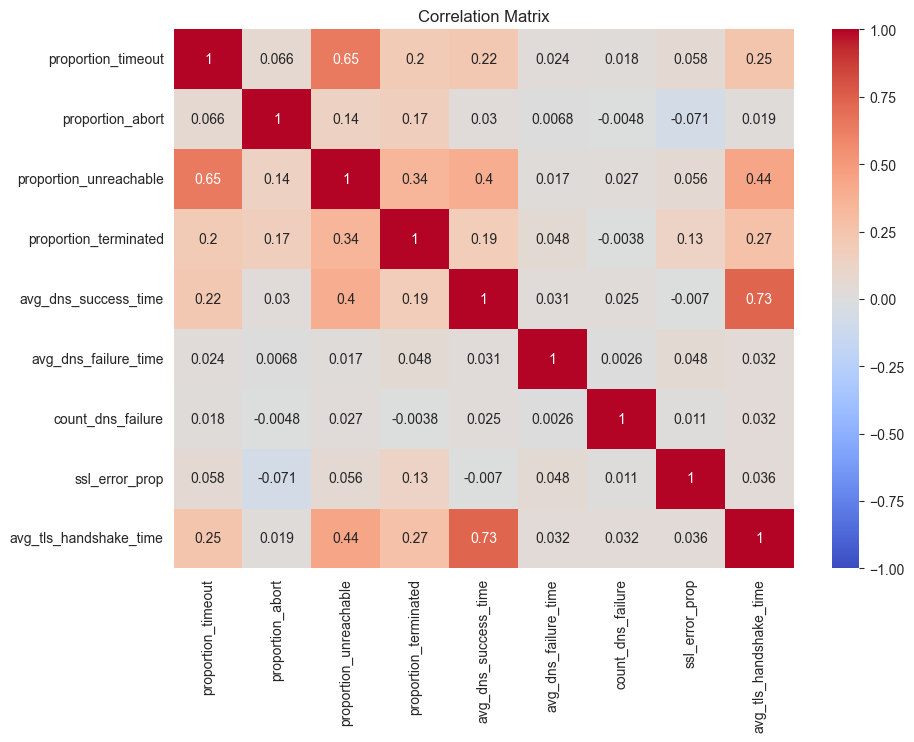

In [15]:
selected_numeric_features = [
    'proportion_timeout', 'proportion_abort', 'proportion_unreachable',
    'proportion_terminated', 'avg_dns_success_time', 'avg_dns_failure_time',
    'count_dns_failure', 'ssl_error_prop', 'avg_tls_handshake_time'
]


correlation_matrix = df[selected_numeric_features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Description**

The heatmap above is used to understand the correlation between continuous features in the dataset. We can see that most of the features have positive correlation. However there are some features which have little negative correlation between them.

## 6. Data Cleaning & Transformation

### Handling country with null values

In [47]:
df_null_country = df[df['country'].isnull()]

In [48]:
df_null_country['city'].unique()

array(['Windhoek', 'unknown'], dtype=object)

In [49]:
city_windhoek_count = df_null_country['city'].value_counts()['Windhoek']
city_unknown_count =  df_null_country['city'].value_counts()['unknown']

total = (city_windhoek_count + city_unknown_count)

print('Windhoek count = {} and unknown count = {}'.format(city_windhoek_count, city_unknown_count))

Windhoek count = 5703 and unknown count = 246


In [50]:
df.loc[df["city"] == "Windhoek", "country"] = 'NA'
df_null_country.loc[df_null_country["city"] == "Windhoek", "country"] = 'NA'

**Description**

Assigning the `country` value 'NA' i.e., Namibia where `city` is Windhoek.

In [51]:
df.isnull().sum()

country                    246
city                         0
datetime                     0
proportion_undefined         0
proportion_timeout           0
proportion_abort             0
proportion_unreachable       0
proportion_terminated        0
proportion_channel_open      0
avg_dns_success_time         0
missing_dns_success          1
avg_dns_failure_time        10
missing_dns_failure          1
count_dns_failure          295
ssl_error_prop               1
avg_tls_handshake_time     696
dtype: int64

In [52]:
df_null_country[df_null_country['country'].isnull()]

,country,city,datetime,proportion_undefined,proportion_timeout,proportion_abort,proportion_unreachable,proportion_terminated,proportion_channel_open,avg_dns_success_time,missing_dns_success,avg_dns_failure_time,missing_dns_failure,count_dns_failure,ssl_error_prop,avg_tls_handshake_time
109124,NaN,unknown,2023-05-15 06:00:00+00:00,0.0,0.058824,0.000000,0.417647,0.076471,0.0,100.169245,0.0,37.494017,0.0,477.522843,0.069486,435.659026
118319,NaN,unknown,2023-03-15 06:00:00+00:00,0.0,0.014184,0.000000,0.290780,0.092199,0.0,82.258631,0.0,15.527511,0.0,500.832215,0.037815,396.419438
119614,NaN,unknown,2023-06-26 14:00:00+00:00,0.0,0.054054,0.000000,0.527027,0.175676,0.0,67.361995,0.0,5.332786,0.0,256.887147,0.088889,78.565046
159879,NaN,unknown,2023-06-07 10:00:00+00:00,0.0,0.169811,0.000000,0.716981,0.188679,0.0,110.610573,0.0,267.116857,0.0,246.936508,0.058201,585.604049
193725,NaN,unknown,2023-10-09 06:00:00+00:00,0.0,0.028169,0.000000,0.316901,0.091549,0.0,75.916114,0.0,29.748556,0.0,1793.246753,0.067616,394.243868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774736,NaN,unknown,2023-04-03 06:00:00+00:00,0.0,0.063830,0.000000,0.368794,0.028369,0.0,88.290037,0.0,112.213611,0.0,337.520548,0.035156,396.403631
11777224,NaN,unknown,2023-08-22 06:00:00+00:00,0.0,0.016667,0.000000,0.266667,0.088889,0.0,65.284245,0.0,25.730311,0.0,727.014851,0.125767,349.291577
11839240,NaN,unknown,2023-06-27 07:00:00+00:00,0.0,0.024476,0.003497,0.234266,0.069930,0.0,55.468002,0.0,63.852830,0.0,143.490964,0.053173,85.784962
11849301,NaN,unknown,2023-09-04 08:00:00+00:00,0.0,0.011111,0.000000,0.477778,0.133333,0.0,66.128119,0.0,14.720958,0.0,323.353741,0.064516,304.879494


In [53]:
df.dropna(subset=['country'], inplace=True)

**Description**

Dropping all the remainder countries having null values as city is also unknown and the data count is significantly small.

In [54]:
df.isnull().sum()

country                      0
city                         0
datetime                     0
proportion_undefined         0
proportion_timeout           0
proportion_abort             0
proportion_unreachable       0
proportion_terminated        0
proportion_channel_open      0
avg_dns_success_time         0
missing_dns_success          1
avg_dns_failure_time        10
missing_dns_failure          1
count_dns_failure          295
ssl_error_prop               1
avg_tls_handshake_time     696
dtype: int64

### Handling all the null values

In [55]:
df = df.dropna()

**Description**

Dropping all the null values as the data count for null values is quite small.


In [56]:
df.isnull().sum()

country                    0
city                       0
datetime                   0
proportion_undefined       0
proportion_timeout         0
proportion_abort           0
proportion_unreachable     0
proportion_terminated      0
proportion_channel_open    0
avg_dns_success_time       0
missing_dns_success        0
avg_dns_failure_time       0
missing_dns_failure        0
count_dns_failure          0
ssl_error_prop             0
avg_tls_handshake_time     0
dtype: int64

### Handling city with unknown values

In [57]:
city_unknown_count =  df['city'].value_counts()['unknown']

city_unknown_count

649844

In [58]:
df_city_unknown = df[df['city'] == 'unknown']
df_city_unknown

,country,city,datetime,proportion_undefined,proportion_timeout,proportion_abort,proportion_unreachable,proportion_terminated,proportion_channel_open,avg_dns_success_time,missing_dns_success,avg_dns_failure_time,missing_dns_failure,count_dns_failure,ssl_error_prop,avg_tls_handshake_time
42,MM,unknown,2023-03-15 05:00:00+00:00,0.000000,0.009988,0.002497,0.273824,0.207241,0.001248,54.514112,0.0,25.432748,0.000126,193.839159,0.044374,201.906444
43,MU,unknown,2023-03-15 10:00:00+00:00,0.000000,0.022642,0.007547,0.286792,0.207547,0.000000,28.861489,0.0,19.204381,0.000000,118.680576,0.129091,153.304849
51,NL,unknown,2023-03-15 01:00:00+00:00,0.000000,0.008701,0.000322,0.108605,0.028360,0.000000,23.154448,0.0,9.785936,0.000000,662.899772,0.061436,55.688799
54,NZ,unknown,2023-03-15 06:00:00+00:00,0.000000,0.011407,0.007605,0.224335,0.076046,0.000000,40.039818,0.0,17.078567,0.000000,168.299263,0.036002,153.187741
98,IR,unknown,2023-02-12 03:00:00+00:00,0.000220,0.049934,0.002782,0.308610,0.115171,0.000220,40.726083,0.0,34.943572,0.000000,429.790218,0.141095,154.575498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905423,BE,unknown,2023-07-12 21:00:00+00:00,0.000000,0.008821,0.002786,0.373723,0.133240,0.000000,33.272854,0.0,11.738950,0.000000,111.428351,0.082143,68.077272
11905447,CY,unknown,2023-07-12 06:00:00+00:00,0.000000,0.000000,0.000000,0.227273,0.168831,0.000000,36.470776,0.0,13.330640,0.000000,162.453271,0.089947,168.265417
11905474,CD,unknown,2023-09-14 21:00:00+00:00,0.000000,0.052632,0.000000,1.035088,0.210526,0.000000,82.735410,0.0,9.961082,0.000000,618.169231,0.054054,403.159456
11905497,BG,unknown,2023-06-06 06:00:00+00:00,0.000562,0.005807,0.000375,0.152117,0.026602,0.000000,22.175931,0.0,15.737100,0.000000,145.987751,0.121318,59.157280


### Converting date into datetime

In [59]:
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

In [60]:
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')
df['time'] = df['datetime'].dt.strftime('%H:%M:%S')

cols = df.columns.tolist()
date_index = cols.index('datetime') + 1
cols = cols[:date_index] + ['date', 'time'] + cols[date_index:-2]
df = df[cols]

**Description**

Converting the datetime feild datatype and derived date and time feature from it.

In [61]:
df

,country,city,datetime,date,time,proportion_undefined,proportion_timeout,proportion_abort,proportion_unreachable,proportion_terminated,proportion_channel_open,avg_dns_success_time,missing_dns_success,avg_dns_failure_time,missing_dns_failure,count_dns_failure,ssl_error_prop,avg_tls_handshake_time
0,US,Cheyenne,2023-02-04 21:00:00+00:00,2023-02-04,21:00:00,0.0,0.012821,0.012821,0.474359,0.192308,0.0,52.775416,0.0,10.427558,0.0,2396.313725,0.108374,128.354046
1,US,Lawrence,2023-02-04 00:00:00+00:00,2023-02-04,00:00:00,0.0,0.000000,0.004975,0.174129,0.027363,0.0,25.603030,0.0,5.644419,0.0,2471.961340,0.067857,75.701084
2,US,Lynnwood,2023-02-04 17:00:00+00:00,2023-02-04,17:00:00,0.0,0.021622,0.005405,0.324324,0.043243,0.0,24.712224,0.0,4.500155,0.0,181.664160,0.044218,70.099312
3,US,San Diego,2023-02-04 12:00:00+00:00,2023-02-04,12:00:00,0.0,0.058824,0.000000,0.231729,0.019608,0.0,22.376406,0.0,8.302528,0.0,293.868080,0.086482,68.930444
4,US,Birmingham,2023-02-04 14:00:00+00:00,2023-02-04,14:00:00,0.0,0.020741,0.002963,0.345185,0.045926,0.0,38.492211,0.0,8.548575,0.0,267.024954,0.078096,72.508400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905556,DE,Remscheid,2023-01-18 18:00:00+00:00,2023-01-18,18:00:00,0.0,0.007614,0.007614,0.167513,0.152284,0.0,22.827740,0.0,10.704429,0.0,41.493827,0.029412,56.669889
11905557,DE,Ingolstadt,2023-01-18 08:00:00+00:00,2023-01-18,08:00:00,0.0,0.012777,0.002017,0.115669,0.120377,0.0,23.474448,0.0,12.342897,0.0,49.596201,0.043188,69.744162
11905558,DE,Reutlingen,2023-01-18 14:00:00+00:00,2023-01-18,14:00:00,0.0,0.003453,0.006906,0.201657,0.156768,0.0,27.520813,0.0,11.010049,0.0,43.545478,0.038510,71.379777
11905559,DE,Marktoberdorf,2023-01-18 13:00:00+00:00,2023-01-18,13:00:00,0.0,0.006757,0.000000,0.141892,0.216216,0.0,19.028394,0.0,17.149718,0.0,46.466019,0.032206,61.628674


In [62]:
df.shape

(11904441, 18)

In [67]:
label_encoder_country = LabelEncoder()
label_encoder_city = LabelEncoder()
df['country_encoded'] = label_encoder_country.fit_transform(df['country'])
df['city_encoded'] = label_encoder_city.fit_transform(df['city'])

# Convert 'datetime' to 'hour'
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

# Define time slots
def get_time_slot(hour):
    if 0 <= hour < 7:
        return 'Midnight'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    else:
        return 'Evening'

df['time_slot'] = df['hour'].apply(get_time_slot)

## 7.  Splitting data into test and training data

In [69]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [70]:
print('train data shape', train_data.shape)
print('test data shape', test_data.shape)

train data shape (9523552, 22)
test data shape (2380889, 22)


## 8. Feature Engineering

In [71]:
#data['unreachable_other_failures_ratio'] = data['proportion_unreachable'] / (data['proportion_timeout'] + data['proportion_abort'] + data['proportion_terminated'])
#data['timeout_other_failures_ratio'] = data['proportion_timeout'] / (data['proportion_abort'] + data['proportion_terminated'])

def feature_engineering(data):
    data['total_failure'] = data['proportion_timeout'] + data['proportion_abort'] + data['proportion_unreachable'] + data['proportion_terminated']
    data['interaction_prop_unreachable_terminated'] = data['proportion_unreachable'] * data['proportion_terminated']

    data['datetime'] = pd.to_datetime(data['datetime'])
    data.sort_values(by='datetime', inplace=True)

    data['moving_avg_unreachable_2'] = data['proportion_unreachable'].rolling(window=2).mean()

    data['timeout_unreachable_interaction'] = data['proportion_timeout'] * data['proportion_unreachable']
    return data

**Description**

Adding the following new features:

* total_failure
* interaction_prop_unreachable_terminated
* moving_avg_unreachable_2
* timeout_unreachable_interaction

In [72]:
train_data_fe = feature_engineering(train_data.copy())
test_data_fe = feature_engineering(test_data.copy())

In [73]:
train_data_fe = train_data_fe.dropna()
test_data_fe = test_data_fe.dropna()

In [74]:
print('train data shape', train_data_fe.shape)
print('test data shape', test_data_fe.shape)

train data shape (9523551, 26)
test data shape (2380888, 26)


## 9. Principal Component Analysis (PCA)

In [75]:
pca = PCA(n_components=1) 
train_data_fe['pca_feature'] = pca.fit_transform(train_data_fe[['total_failure', 'interaction_prop_unreachable_terminated', 'moving_avg_unreachable_2', 'timeout_unreachable_interaction']])
test_data_fe['pca_feature'] = pca.transform(test_data_fe[['total_failure', 'interaction_prop_unreachable_terminated', 'moving_avg_unreachable_2', 'timeout_unreachable_interaction']])

In [76]:
def categorize_pca_feature(value):
    # Define thresholds
    if value <= 0.5:
        return 'Good'
    elif value <= 1.0:
        return 'Moderate'
    elif value <= 1.5:
        return 'Bad'
    else:
        return 'Worse'

In [77]:
train_data_fe['network_status_pca'] = train_data_fe['pca_feature'].apply(categorize_pca_feature)
test_data_fe['network_status_pca'] = test_data_fe['pca_feature'].apply(categorize_pca_feature)

## 10. Using PCA features for model fitting

In [78]:
X_train = train_data_fe[['country_encoded', 'city_encoded', 'hour', 'pca_feature']]
y_train = train_data_fe['network_status_pca']
X_test = test_data_fe[['country_encoded', 'city_encoded', 'hour', 'pca_feature']]
y_test = test_data_fe['network_status_pca']

## 11. SMOTE for balancing training set

In [79]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [80]:
print('X_train shape', X_train_smote.shape)
print('Y train shape', y_train_smote.shape)

X_train shape (37089948, 4)
Y train shape (37089948,)


In [81]:
unique, counts = np.unique(y_train_smote, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in y_train_smote:", class_distribution)

Class distribution in y_train_smote: {'Bad': 9272487, 'Good': 9272487, 'Moderate': 9272487, 'Worse': 9272487}


# Modeling

In [84]:
# Sample a smaller subset of your data for hyperparameter tuning
X_train_sampled, y_train_sampled = resample(X_train_smote, y_train_smote, 
                                            n_samples=200000000, # Adjust the number of samples as per memory capacity
                                            random_state=0)

param_distributions = {
    'n_estimators': [100, 200, 300],  # Reduced number of options
    'max_depth': [None, 20, 40],       # Reduced number of options
    'min_samples_split': [2, 10, 20],  # Reduced number of options
    'min_samples_leaf': [1, 4, 8],     # Reduced number of options
    'max_features': ['auto', 'sqrt']
}

# Instantiate the RandomForest model
rf = RandomForestClassifier(random_state=0)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=50, cv=2, verbose=2, random_state=0, n_jobs=1)

# Fit the random search model
random_search.fit(X_train_sampled, y_train_sampled)

# Extracting the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))

# Optionally, print the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)


Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   9.4s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   9.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=266.7min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=279.2min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=  23.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_e

KeyboardInterrupt: 

In [ ]:
from joblib import dump

# Assuming the rest of your code is above this point, including RandomizedSearchCV
# ...

# Extracting the best model
best_model = random_search.best_estimator_

# Save the model to a file
model_filename = 'D:\MSDA\Sem 2\Machine Learning\Project\Mozilla Outage Prediction\best_random_forest_model.joblib'
dump(best_model, model_filename)

print(f"Model saved as {model_filename}")